## End-to-End Classifiation of Veggies 🥦🥬

In [1]:
things_to_learn={1:'Check your tensorflow version',
                 2:'Import the required libraries',
                 3:'Walk through the data',
                 4:'Peform data augmentation',
                 5:"Check the number of classes",
                 6:'Build a CNN model(Wohhh here we are)',
                 7:'Compile your model',
                 8:'Fit the model',
                 9:'Check how well your model is(Putting it all together)',
                 10:'Check predictions of your model',
                 11:'Save your model'}
things_to_learn

{1: 'Check your tensorflow version',
 2: 'Import the required libraries',
 3: 'Walk through the data',
 4: 'Peform data augmentation',
 5: 'Check the number of classes',
 6: 'Build a CNN model(Wohhh here we are)',
 7: 'Compile your model',
 8: 'Fit the model',
 9: 'Check how well your model is(Putting it all together)',
 10: 'Check predictions of your model',
 11: 'Save your model'}

### 1. Checking the TensorFlow Version

In [2]:
import tensorflow
print(tensorflow.__version__)

2.11.0


### 2. Importing the required libraries

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

### Downloading The Vegetable Dataset Zip

In [4]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=13IicsDZW_3RPmVD8luOOSZcRX_YFvKna

Downloading...
From: https://drive.google.com/uc?id=13IicsDZW_3RPmVD8luOOSZcRX_YFvKna
To: /content/Vegetable Images.zip
100% 569M/569M [00:02<00:00, 274MB/s]


###  If your drives folder after downloading  says copy of copy.... then just rename it to  **Vegetable Images**

### UnZipping The Data

In [5]:
!unzip "/content/Vegetable Images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/validation/Pumpkin/1255.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1255.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1269.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1269.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1282.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1282.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1296.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1296.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1297.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1297.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1283.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1283.jpg  
  inflating: Vegetable Images/validation/Pumpkin/1268.jpg  
  inflating: __MACOSX/Vegetable Images/validation/Pumpkin/._1268.jpg  
  inflating: Vegetable Images/va

## 3. Walking throught the directories

### Assigning The Train and Test

In [6]:
train_dir =  "/content/Vegetable Images/train"
test_dir = "/content/Vegetable Images/validation"

In [7]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
walk_through_dir(train_dir)

There are 15 directories and 0 images in '/content/Vegetable Images/train'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Broccoli'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Papaya'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Bitter_Gourd'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Cauliflower'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Tomato'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Bean'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Potato'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Brinjal'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Cucumber'.
There are 0 directories and 1000 images in '/content/Vegetable Images/train/Bottle_Gourd'.
There are 0 directories and 1000 images in '/content/V

### 4. Perform Data Augmentation on the processed data

In [9]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

test_datagen_augmented = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size =(224,224),
                                                         batch_size = 32,
                                                         class_mode = "categorical")
test_data = test_datagen_augmented.flow_from_directory(test_dir,
                                                         target_size =(224,224),
                                                         batch_size = 32,
                                                         class_mode = "categorical")



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## 5. Number of Classes

In [11]:
class_names = list(train_data.class_indices.keys())
print(class_names)
print(len(class_names))

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


## 6. Here comes the most interesting part for which we all have been waiting for

**Build your own model**

`We will building a CNN model which would be consisting of following layers`
* Convolutional layers
* Pooling layers
* Flatten layers
* Output layer

In [13]:
model = Sequential([
    Conv2D(10,3,activation = "relu", input_shape=(224,224,3)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Flatten(),

    Dense(15,activation = "softmax") # Multiple Categories
])

### Summary Of Model

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## 7. Compile the model you have built

In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = 'accuracy')

## 8. Fitting the model

In [16]:
history = model.fit(train_data,
                    epochs = 2,
                    validation_data = test_data,
                    batch_size = 32)


Epoch 1/2
469/469 [==============================] - 194s 387ms/step - loss: 1.4738 - accuracy: 0.5069 - val_loss: 0.9794 - val_accuracy: 0.6877
Epoch 2/2
469/469 [==============================] - 182s 388ms/step - loss: 0.9762 - accuracy: 0.6823 - val_loss: 0.7092 - val_accuracy: 0.7723


## 9. Checking how well your predictions are

In [17]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

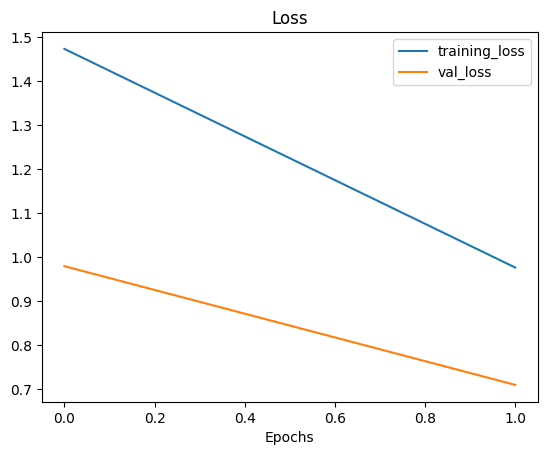

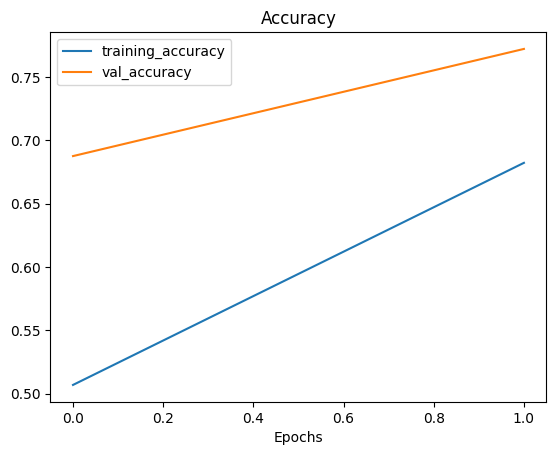

In [18]:
plot_loss_curves(history)

In [21]:
loaded_model = tf.keras.models.load_model("/content/Veggies_Classifier_CNN_model.h5")

## 10. Check your model predictions

In [22]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [23]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred.argmax()] # if more than one output, take the max
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


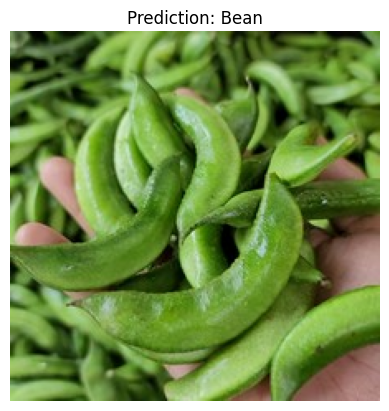

In [25]:
pred_and_plot(loaded_model, "/content/Vegetable Images/test/Bean/0005.jpg", class_names)

## 🎉 Congrats on Building the Model Now we just have to save this model

In [26]:
model.save("model.h5")